In [272]:
%matplotlib inline
import numpy 
from sympy import *
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [380]:
T = 50
dt = 0.0001
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

#V = 10 #Volts changes to be V = 250/I
R = 0.143 #Ohms
#Kn = 364*2*numpy.pi/60
Km = .0263 #N-m/Amp
Ratio = 300 # Speed Reducing Ratio
Inertia = 26.831/Ratio #kg-m^2 Payload inertia 
Irated = 12.5 #Amps
Rwindhous = 1.7+1.1 #Degrees C per Watt
acu = 0.0039 #thermal resistance coefficeint for copper
Tamb = 25 #degrees C
Thermaltimeconstant =31 #seconds

Imax = 500/28 #Amps
Itimemax = 6.1999 #Seconds 6.73
Icontinuous = 0 #Amps
Iramprate = 1000 #Amps/Second
Itimecontinuous = 0 #seconds
#Itimecontinuous = ((Imax/Irated)**2*Itimemax)-Itimemax #seconds

T1 =      int((Imax/Iramprate)/dt) #ramp up
T2 = T1 + int(Itimemax/dt) #dwell at max
T3 = T2 + int(((Imax-Icontinuous)/Iramprate)/dt) #ramp down
T4 = T3 + int(Itimecontinuous/dt) #dwell at continuous
T5 = T4 + int(((Imax-Icontinuous)/Iramprate)/dt) #ramp up
T6 = T5 + int(Itimemax/dt) #dwell at max
T7 = T6 + int(((Imax-Icontinuous)/Iramprate)/dt) #ramp down
T8 = T7 + int(Itimecontinuous/dt) #dwell at continuous
T9 = T8 + int(((Imax-Icontinuous)/Iramprate)/dt) #ramp up
T10 = T9 + int(Itimemax/dt) #dwell at max
T11 = T10 + int(((Imax-Icontinuous)/Iramprate)/dt) #ramp down

In [381]:

def Ivalues(Imax,Itimemax,Icontinuous,Iramprate,Itimecontinuous,N):
    I = numpy.zeros(N)
    I[:] = Icontinuous
    I[0] = 0
    for i in range(1,T1): #ramp up
        I[i] = Iramprate*(dt*i)
    for i in range(T1,T2): #dwell at max
        I[i] = Imax
    for i in range(T2,T3): #ramp down
        I[i] = Imax - Iramprate*(dt*(i-T2))
    for i in range(T3,T4): #dwell at continuous
        I[i] = Icontinuous
    for i in range(T4,T5): #ramp up
        I[i] = Icontinuous - Iramprate*(dt*(i-T4))
    for i in range(T5,T6): #dwell at max
        I[i] = -Imax
    for i in range(T6,T7): #ramp down
        I[i] = -Imax + Iramprate*(dt*(i-T6)) 
#    for i in range(T7,T8): #dwell at continuous
#        I[i] = Icontinuous      
#    for i in range(T8,T9): #ramp up
#        I[i] = Icontinuous + Iramprate*(dt*(i-T8)) 
#    for i in range(T9,T10): #dwell at max
#        I[i] = Imax
#    for i in range(T10,T11): #ramp down
#        I[i] = Imax - Iramprate*(dt*(i-T10))
    V = numpy.zeros(N)
    for i in range(0,N):
        if I[i]==0:
            V[i]=28
        elif abs(500/I[i])>28:
            V[i]=28
        else:
            V[i]=abs(500/I[i] )  
    return I[:], V[:]

In [382]:
I,V = Ivalues(Imax,Itimemax,Icontinuous,Iramprate,Itimecontinuous,N) 
alpha = numpy.zeros(N)
alpha[:] = 0.0
omega = numpy.zeros(N)
omega[:] = 0.001
theta = numpy.zeros(N)
theta[:] = 0.0
theta[0] = 0.0
temp = numpy.zeros(N)
temp[:] = 25 #degrees C


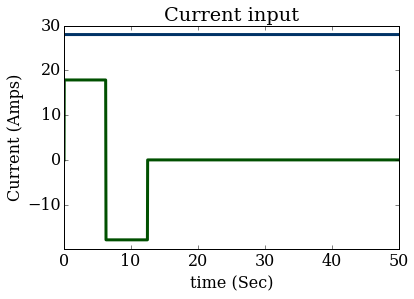

In [383]:
pyplot.plot(t, I, color='#005000', ls='-', lw=3)
pyplot.plot(t, V, color='#003366', ls='-', lw=3)
pyplot.title('Current input')
pyplot.ylabel('Current (Amps)')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,T);
pyplot.ylim(numpy.amin(I)-2,numpy.amax(V)+2);


In [384]:
# time-loop using Euler's method
for n in range(1,N):       
    omega[n] = omega[n-1] + dt*(I[n-1]*(V[n-1]-(R*(1+acu*(temp[n-1]-Tamb)))*I[n-1])/(Inertia*omega[n-1]))
    theta[n] = theta[n-1] + dt*omega[n-1]
    alpha[n] = (omega[n]-omega[n-1])/dt
    temp[n] = temp[n-1] + dt*(Rwindhous*abs(I[n-1])*(R*(1+acu*(temp[n-1]-Tamb)))-temp[n-1]/Thermaltimeconstant+Tamb/Thermaltimeconstant)
    if theta[n]>=2*numpy.pi*Ratio:
        theta[n:] = theta[n]
        timestamp = (n)*dt
        break

11.2561

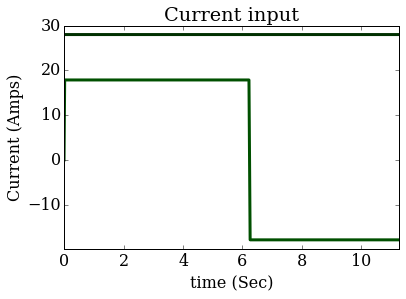

In [385]:
pyplot.plot(t, I, color='#005000', ls='-', lw=3)
pyplot.plot(t, V, color='#003000', ls='-', lw=3)
pyplot.title('Current input')
pyplot.ylabel('Current (Amps)')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,timestamp);
pyplot.ylim(numpy.amin(I)-2,numpy.amax(V)+2);
timestamp

360.00003113274988

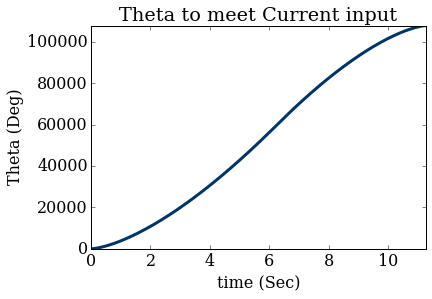

In [386]:
pyplot.plot(t, theta*180/numpy.pi, color='#003366', ls='-', lw=3)
pyplot.title('Theta to meet Current input')
pyplot.ylabel('Theta (Deg)')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,timestamp);
pyplot.ylim(0,numpy.amax(theta)*180/numpy.pi);
numpy.amax(theta)*180/numpy.pi/300

(47.805316175208858, 0.0001909859317102744)

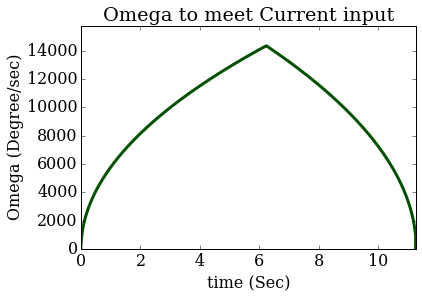

In [390]:
pyplot.plot(t, omega*180/numpy.pi, color='#005000', ls='-', lw=3)
pyplot.title('Omega to meet Current input')
pyplot.ylabel('Omega (Degree/sec)')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,timestamp);
pyplot.ylim(numpy.amin(omega)*180/numpy.pi,numpy.amax(omega)*180/numpy.pi*1.1);
numpy.amax(omega)*180/numpy.pi/300, numpy.amin(omega)*180/numpy.pi/300

5976.1562995015765

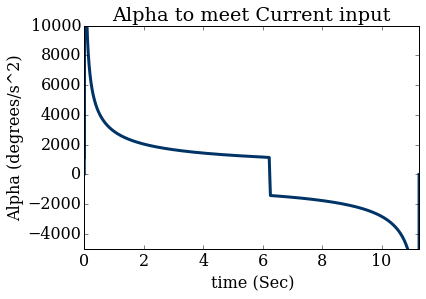

In [388]:
pyplot.plot(t, alpha*180/numpy.pi, color='#003366', ls='-', lw=3)
pyplot.title('Alpha to meet Current input')
pyplot.ylabel('Alpha (degrees/s^2)')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,timestamp);
#pyplot.ylim(-numpy.amax(alpha)*180/numpy.pi,numpy.amax(alpha)*180/numpy.pi);
pyplot.ylim(-5000,10000);
numpy.amax(alpha)*180/numpy.pi/300

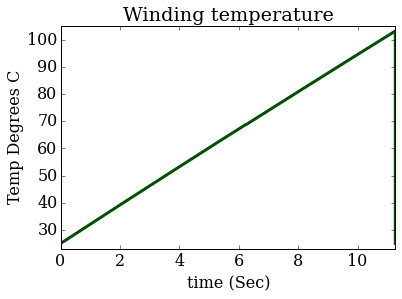

In [389]:
pyplot.plot(t, temp, color='#005000', ls='-', lw=3)
pyplot.title('Winding temperature')
pyplot.ylabel('Temp Degrees C')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,timestamp);
pyplot.ylim(numpy.amin(temp)-2,numpy.amax(temp)+2);